In [ ]:
from posydon.popsyn.binarypopulation import BinaryPopulation
from posydon.binary_evol.simulationproperties import SimulationProperties
from posydon.binary_evol.flow_chart import flow_chart
from posydon.binary_evol.CE.step_CEE import StepCEE
from posydon.binary_evol.SN.step_SN import StepSN
from posydon.binary_evol.step_end import step_end
from posydon.binary_evol.MESA.step_mesa import CO_HeMS_step, MS_MS_step, CO_HMS_RLO_step
from posydon.binary_evol.DT.step_detached import detached_step
from posydon.binary_evol.DT.double_CO import DoubleCO

import pandas as pd

In [2]:
sim_kwargs = dict(
    flow = (flow_chart, {}),
    step_HMS_HMS = (MS_MS_step, {}),
    step_CO_HeMS = (CO_HeMS_step, {}),
    step_CO_HMS_RLO = (CO_HMS_RLO_step, {}),
    step_detached = (detached_step, {}),
    step_CE = (StepCEE, {}),
    step_SN = (StepSN, {}),
    step_dco = (DoubleCO, {}),
    step_end = (step_end, {})
)

sim_prop = SimulationProperties(**sim_kwargs)

In [3]:
pop = BinaryPopulation(population_properties=sim_prop)

pop.evolve()

In [4]:
interp_str = 'nearest_neighbour'

sim_kwargs = dict(
    flow = (flow_chart, {}),
    step_HMS_HMS = (MS_MS_step, dict(interpolation_method=interp_str)),
    step_CO_HeMS = (CO_HeMS_step, dict(interpolation_method=interp_str)),
    step_CO_HMS_RLO = (CO_HMS_RLO_step, dict(interpolation_method=interp_str)),
    step_detached = (detached_step, {}),
    step_CE = (StepCEE, {}),
    step_SN = (StepSN, {}),
    step_dco = (DoubleCO, {}),
    step_end = (step_end, {}),
)

sim_prop = SimulationProperties(**sim_kwargs)

kwargs = {'number_of_binaries' : 1000}

pop = BinaryPopulation(population_properties=sim_prop,**kwargs)

In [7]:
pop.evolve(breakdown_to_df=False, tqdm=True)

100%|██████████| 1000/1000 [15:25<00:00,  1.08it/s] 


Traceback (most recent call last):
  File "/fs/lustre/scratch/RAID-CITA/claireshiye/POSYDON/posydon/popsyn/binarypopulation.py", line 370, in combine_saved_files
    min_itemsize=history_min_itemsize)
  File "/mnt/raid-cita/claireshiye/opt/anaconda3/envs/posydon-git/lib/python3.7/site-packages/pandas/io/pytables.py", line 1278, in append
    errors=errors,
  File "/mnt/raid-cita/claireshiye/opt/anaconda3/envs/posydon-git/lib/python3.7/site-packages/pandas/io/pytables.py", line 1785, in _write_to_group
    track_times=track_times,
  File "/mnt/raid-cita/claireshiye/opt/anaconda3/envs/posydon-git/lib/python3.7/site-packages/pandas/io/pytables.py", line 4299, in write
    data_columns=data_columns,
  File "/mnt/raid-cita/claireshiye/opt/anaconda3/envs/posydon-git/lib/python3.7/site-packages/pandas/io/pytables.py", line 3953, in _create_axes
    columns=b_items,
  File "/mnt/raid-cita/claireshiye/opt/anaconda3/envs/posydon-git/lib/python3.7/site-packages/pandas/io/pytables.py", line 5002, 

In [16]:
#DF = pop.to_df()
#pop.save('population_1000.h5', **kwargs )
with pd.HDFStore('population_1000.h5') as hdf:
    # This prints a list of all group names:
    print(hdf.keys())

DF = pd.read_hdf('population_1000.h5', key = '/history')
#list(DF)
#print(DF)

['/history', '/oneline']
                 state event          time  separation  orbital_period  \
binary_index                                                             
0             detached  ZAMS  3.469716e+09   25.468779        2.316571   
0             detached   NaN  3.469716e+09   25.120932        2.275846   
0              contact  oCE1  3.473804e+09   14.373571        1.051488   
0               merged   NaN           NaN         NaN             NaN   
0               merged   END           NaN         NaN             NaN   
...                ...   ...           ...         ...             ...   
999           detached  ZAMS  9.938097e+09   10.323687        1.064315   
999           detached   NaN  9.938098e+09    9.863658        1.000000   
999            contact  oCE1  9.949948e+09    7.603318        0.689964   
999             merged   NaN           NaN         NaN             NaN   
999             merged   END           NaN         NaN             NaN   

            

In [25]:
###BH-NS
output_cols = ['state','time','event','S1_state','S2_state','S1_mass','S2_mass','orbital_period','eccentricity']
DF.loc[(DF['S1_state'] == 'BH')&(DF['S2_state'] == 'NS')&(DF['event'] == 'END')&(DF['state'] != 'disrupted')
       ,output_cols]

,state,time,event,S1_state,S2_state,S1_mass,S2_mass,orbital_period,eccentricity
binary_index,,,,,,,,,
32,contact,3.455923e+09,END,BH,NS,12.257591,1.346300,1.840094e-08,0.0
279,contact,6.978600e+08,END,BH,NS,12.261049,1.279188,1.844983e-08,0.0


In [28]:
index_BHNS = DF.loc[(DF['S1_state'] == 'BH')&(DF['S2_state'] == 'NS')&
                    (DF['event'] == 'END')&
                    (DF['state'] != 'disrupted')].index
DF.loc[index_BHNS[0], output_cols]


,state,time,event,S1_state,S2_state,S1_mass,S2_mass,orbital_period,eccentricity
binary_index,,,,,,,,,
32,detached,2.904959e+09,ZAMS,H-rich_Core_H_burning,H-rich_Core_H_burning,31.687562,25.994770,1.805893e+02,0.000000
32,detached,2.904959e+09,NaN,H-rich_Core_H_burning,H-rich_Core_H_burning,31.616781,25.293426,1.930698e+02,0.000000
32,detached,2.911510e+09,CC1,stripped_He_Central_C_depletion,H-rich_Core_H_burning,11.803006,24.464982,4.158074e+02,0.000000
32,detached,2.911510e+09,NaN,BH,H-rich_Core_H_burning,11.303006,24.464982,3.941828e+02,0.184983
32,RLO2,2.912446e+09,oRLO2,BH,H-rich_Shell_H_burning,11.303006,22.802276,3.845032e+02,0.000000
32,RLO2,2.912446e+09,NaN,BH,H-rich_Shell_H_burning,12.257592,25.898080,3.483258e+02,0.000000
32,RLO2,2.912447e+09,oCE2,BH,H-rich_Shell_H_burning,12.258008,21.844037,2.690781e+02,0.000000
32,detached,2.912447e+09,NaN,BH,stripped_He_non_burning,12.258008,12.273487,2.192022e-01,0.000000
32,detached,2.912448e+09,NaN,BH,stripped_He_Core_He_burning,12.257591,12.934067,2.137341e-01,0.000000


In [29]:
DF_BHNS = DF.loc[index_BHNS]
index_BHNS_CE = DF_BHNS.loc[(DF_BHNS["event"]=="oCE2")].index

DF_BHNS.loc[index_BHNS_CE[0], output_cols]

,state,time,event,S1_state,S2_state,S1_mass,S2_mass,orbital_period,eccentricity
binary_index,,,,,,,,,
32,detached,2.904959e+09,ZAMS,H-rich_Core_H_burning,H-rich_Core_H_burning,31.687562,25.994770,1.805893e+02,0.000000
32,detached,2.904959e+09,NaN,H-rich_Core_H_burning,H-rich_Core_H_burning,31.616781,25.293426,1.930698e+02,0.000000
32,detached,2.911510e+09,CC1,stripped_He_Central_C_depletion,H-rich_Core_H_burning,11.803006,24.464982,4.158074e+02,0.000000
32,detached,2.911510e+09,NaN,BH,H-rich_Core_H_burning,11.303006,24.464982,3.941828e+02,0.184983
32,RLO2,2.912446e+09,oRLO2,BH,H-rich_Shell_H_burning,11.303006,22.802276,3.845032e+02,0.000000
32,RLO2,2.912446e+09,NaN,BH,H-rich_Shell_H_burning,12.257592,25.898080,3.483258e+02,0.000000
32,RLO2,2.912447e+09,oCE2,BH,H-rich_Shell_H_burning,12.258008,21.844037,2.690781e+02,0.000000
32,detached,2.912447e+09,NaN,BH,stripped_He_non_burning,12.258008,12.273487,2.192022e-01,0.000000
32,detached,2.912448e+09,NaN,BH,stripped_He_Core_He_burning,12.257591,12.934067,2.137341e-01,0.000000


In [3]:
#X-ray binaries
DF_end = DF[DF['event']=='END']
star1_is_CO = ( (DF_end["S1_state"] == "NS") | (DF_end["S1_state"] == "BH") ) & (DF_end["S2_state"] != "WD")
star2_is_CO = ( (DF_end["S2_state"] == "NS") | (DF_end["S2_state"] == "BH") ) & (DF_end["S2_state"] != "WD")
exactly_one_CO = (star1_is_CO & ~star2_is_CO) | (~star1_is_CO & star2_is_CO)
only_one_CO = DF_end[exactly_one_CO]

In [9]:
only_one_CO['state'].unique()

array(['disrupted', 'merged', 'detached (GridMatchingFailed)',
       'initial_RLOF', 'undefined'], dtype=object)

In [5]:
DF_XRB = only_one_CO[(only_one_CO['state']=='detached') |
                     (only_one_CO['state']=='RLO1') |
                     (only_one_CO['state']=='RLO2')]

In [10]:
from posydon.utils.common_functions import CO_radius
import posydon.utils.constants as const
import numpy as np

In [11]:
def Lx(S1_state, S1_mass, S1_lg_mdot,S2_state, S2_mass, S2_lg_mdot, lg_mtransfer_rate):

    if np.isnan(lg_mtransfer_rate):
        if S1_state == 'NS':
            eta = 0.1
            acc_lg_mdot = S1_lg_mdot
        elif S1_state == 'BH':
            eta = 0.057
            acc_lg_mdot = S1_lg_mdot
        else:
            print("CO??", S1_state, S2_state)
    else:
        acc_lg_mdot = lg_mtransfer_rate
        if S1_state == 'NS':
            eta = 0.1
        elif S1_state == 'BH':
            eta = 0.057
        else:
            print("CO??", S1_state, S2_state)

    return eta * (10.0**acc_lg_mdot * const.Msun / const.secyer) * const.clight**2


In [15]:
DF_XRB['Lacc']= DF_XRB[['S1_state', 'S1_mass', 'S1_lg_mdot',
                 'S2_state', 'S2_mass','S2_lg_mdot',
                 'lg_mtransfer_rate']].apply(lambda x: Lx(x['S1_state'], x['S1_mass'],
                                                          x['S1_lg_mdot'],x['S2_state'],
                                                          x['S2_mass'], x['S2_lg_mdot'],
                                                          x['lg_mtransfer_rate']), axis=1)

Empty DataFrame
Columns: [S1_state, S1_mass, S1_lg_mdot, S2_state, S2_mass, S2_lg_mdot, lg_mtransfer_rate]
Index: []


In [21]:
###Plotting
from posydon.grids.psygrid import PSyGrid
grid = PSyGrid("/fs/lustre/cita/claireshiye/MyCodes/PythonCodes/POSYDON_data/HMS-HMS/grid_0.0142_%d.h5")

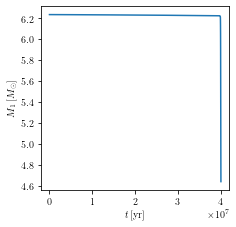

In [23]:
PLOT_PROPERTIES_1 = {
    'show_fig' : True,
    'close_fig' : True,
    #'path_to_file': './plots_demo/',
    'fname': '1D_age_M1.png',
}

grid.plot(42, 'age', 'star_1_mass', history='binary_history', **PLOT_PROPERTIES_1)

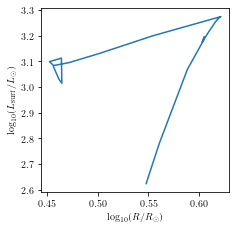

In [24]:
PLOT_PROPERTIES_2 = PLOT_PROPERTIES_1
PLOT_PROPERTIES_2['fname'] = '1D_logR_logL.png'

grid.plot(42, 'log_R', 'log_L', history='history1', **PLOT_PROPERTIES_2)

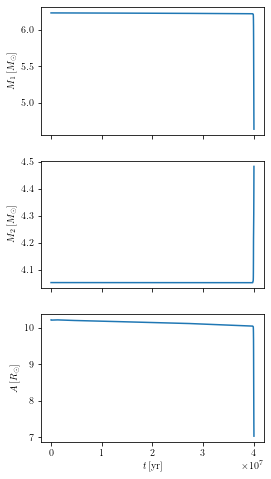

In [25]:
PLOT_PROPERTIES_4 = PLOT_PROPERTIES_1
PLOT_PROPERTIES_4['fname'] = '1D_age_bin.png'
PLOT_PROPERTIES_4['figsize'] = (4., 8.)

grid.plot(42, 'age', ['star_1_mass', 'star_2_mass', 'binary_separation'], history='binary_history', **PLOT_PROPERTIES_4)